In [1]:
import os 
os.getcwd()

'C:\\Users\\prem'

In [2]:
os.chdir("C:/Users/prem/Desktop/BTP")

In [3]:
import numpy as np 
import pandas as pd 

In [4]:
data  = pd.read_csv("Churn_Modelling.csv")

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
dropped = ["RowNumber","CustomerId","Surname"]

for i in range(len(dropped)):
    del data[dropped[i]]

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


ceil() the Balance Attribute  and EstimatedSalary feature to work efficiently

In [9]:
data["Balance"] = np.ceil(data["Balance"]).astype(int)
data["EstimatedSalary"] = np.ceil(data["EstimatedSalary"]).astype(int)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0,1,1,1,101349,1
1,608,Spain,Female,41,1,83808,1,0,1,112543,0
2,502,France,Female,42,8,159661,3,1,0,113932,1
3,699,France,Female,39,1,0,2,0,0,93827,0
4,850,Spain,Female,43,2,125511,1,1,1,79085,0


Trasformation 

Gender and Geography both are categorical fetures. To deal with these features we chnage to Numericals 

In [11]:
data = pd.get_dummies(data)

In [12]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101349,1,1,0,0,1,0
1,608,41,1,83808,1,0,1,112543,0,0,0,1,1,0
2,502,42,8,159661,3,1,0,113932,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93827,0,1,0,0,1,0
4,850,43,2,125511,1,1,1,79085,0,0,0,1,1,0


Data Visualization

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline 

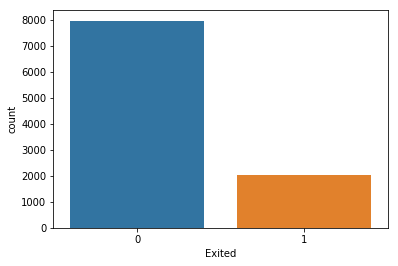

In [14]:
sns.countplot(x= "Exited",data=data)

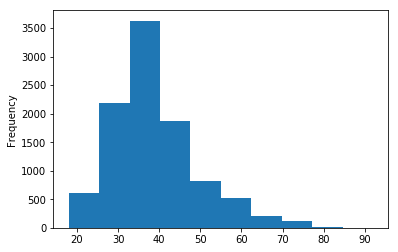

In [15]:
data["Age"].plot.hist()

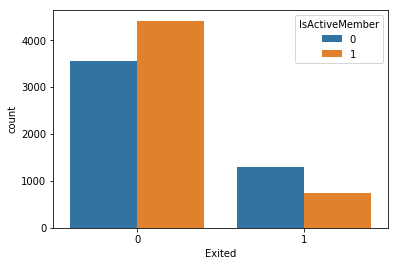

In [16]:
sns.countplot(x= "Exited",hue = "IsActiveMember" , data=data)

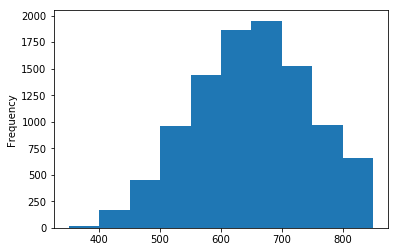

In [17]:
data["CreditScore"].plot.hist()

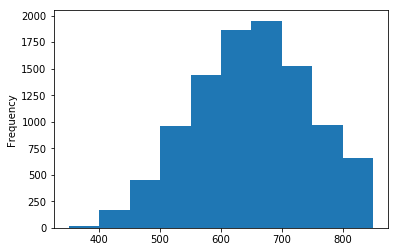

In [18]:
data["CreditScore"].plot.hist()

OutLiers check

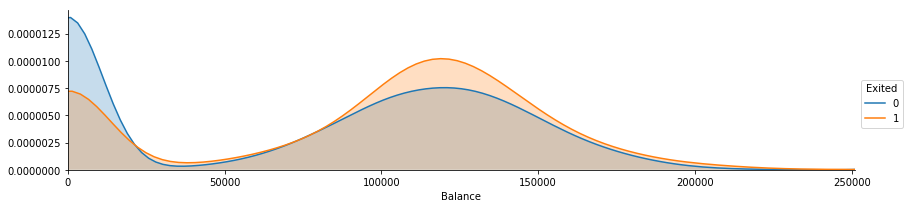

In [19]:
facet = sns.FacetGrid(data, hue="Exited",aspect=4)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, data["Balance"].max()))
facet.add_legend()

plt.show()

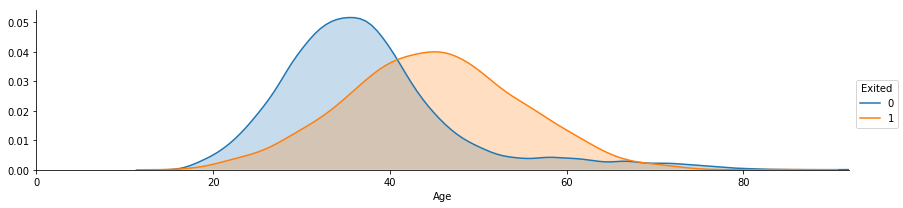

In [20]:
facet = sns.FacetGrid(data, hue="Exited",aspect=4)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, data["Age"].max()))
facet.add_legend()

plt.show()

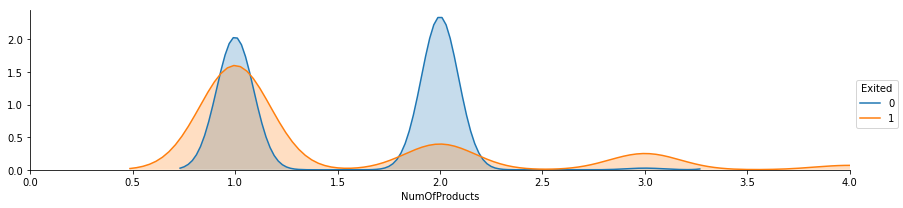

In [22]:
facet = sns.FacetGrid(data, hue="Exited",aspect=4)
facet.map(sns.kdeplot,"NumOfProducts",shade= True)
facet.set(xlim=(0, data["NumOfProducts"].max()))
facet.add_legend()

plt.show()

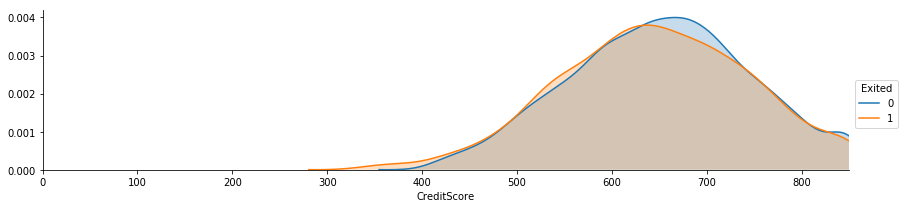

In [57]:
facet = sns.FacetGrid(data, hue="Exited",aspect=4)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, data["CreditScore"].max()))
facet.add_legend()

plt.show()

Detecting OutLiers

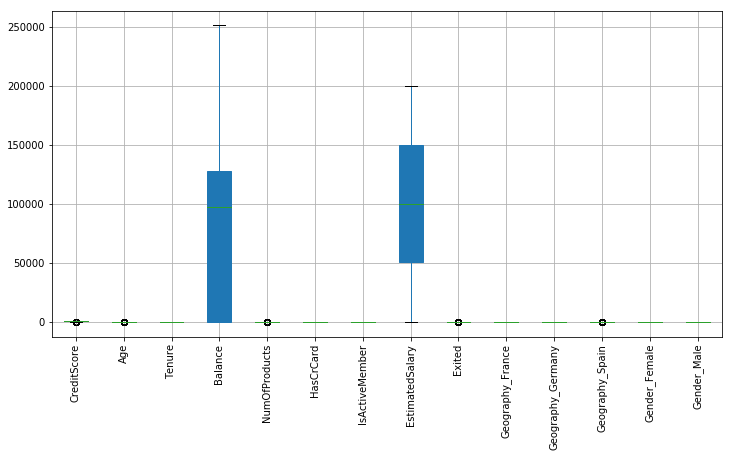

In [58]:
plt.figure(figsize=(12,6))
bplot = data.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

In [59]:


minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
        
    return flag
for i in range(len(data.columns)):
    if(detect_outlier(data[data.columns[i]])):
        print(data.columns[i])

CreditScore
Age
NumOfProducts
Exited
Geography_Spain


ReMoving Detected Outliers

In [60]:
def remove_outlier(feature):
    first_q = np.percentile(data[feature], 25)
    third_q = np.percentile(data[feature], 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    
    mean = data[feature].median()
    
    data.loc[data[feature] < minimum, feature] = mean
    data.loc[data[feature] > maximum, feature] = mean

In [61]:
outliers = ["CreditScore", "Age", "NumOfProducts"]

for i in range(len(outliers)):
    remove_outlier(outliers[i])


Checking Correlation

Decision Tree Algorithm 

In [7]:
X = data.iloc[:, data.columns != "Exited"]
y = data["Exited"]

NameError: name 'data' is not defined

In [63]:
X.head(5)



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2,0,1.0,1,1,101349,1,0,0,1,0
1,608.0,41.0,1,83808,1.0,0,1,112543,0,0,1,1,0
2,502.0,42.0,8,159661,3.0,1,0,113932,1,0,0,1,0
3,699.0,39.0,1,0,2.0,0,0,93827,1,0,0,1,0
4,850.0,43.0,2,125511,1.0,1,1,79085,0,0,1,1,0


In [64]:
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from sklearn import tree

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: name 'X' is not defined

In [3]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

NameError: name 'X_train' is not defined

In [68]:
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("F1:", f1_score(y_test, pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, pred))

Accuracy: 0.781
Precision: 0.46405228758169936
Recall: 0.5259259259259259
F1: 0.4930555555555556
Area under precision (AUC) Recall: 0.3400571290244493


In [69]:
confusion_matrix(y_test, pred)

array([[1349,  246],
       [ 192,  213]], dtype=int64)

Segmentation 